Hola **Elias**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

#### Pureba A/B

### Instrucciones para completar la tarea

1. **Describe los objetivos del estudio.**
   - Explica cuál es el propósito del análisis y qué se espera lograr con la prueba A/B.

2. **Explora los datos:**
   - ¿Es necesario convertir los tipos de datos?
   - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

3. **Lleva a cabo el análisis exploratorio de datos (EDA):**
   - Estudia la conversión en las diferentes etapas del embudo.
   - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
   - ¿Hay usuarios que están presentes en ambas muestras?
   - ¿Cómo se distribuye el número de eventos entre los días?
   - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

4. **Evaluar los resultados de la prueba A/B:**
   - ¿Qué puedes decir sobre los resultados de la prueba A/B?
   - Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

5. **Describe tus conclusiones:**
   - Resume los hallazgos del análisis exploratorio de datos (EDA).
   - Interpreta los resultados de la prueba A/B y proporciona recomendaciones basadas en los datos.

1. **Describe los objetivos del estudio.**
   - Explica cuál es el propósito del análisis y qué se espera lograr con la prueba A/B.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

In [4]:
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
looks(marketing_events)

Se ejecuta la descripción de los datos:
                                   name regions    start_dt   finish_dt
count                                14      14          14          14
unique                               14       6          14          14
top     Victory Day CIS (May 9th) Event    APAC  2020-11-26  2020-07-11
freq                                  1       4           1           1

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

se hace una observación con el método Sample:
                                name                   regions    start_dt  \
12           Single's Day Gift Promo               

In [5]:
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
looks(new_users)

Se ejecuta la descripción de los datos:
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     233D093E128C6AB1  2020-12-21     EU  Android
freq                   1        6077  43396    26159

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

se hace una observación con el método Sample:
                user_id  first_date region   device
23655  C7A13E45EC06BC98  2020-12-22     EU  Android
3412   F9945FBF588762BE  2020-12-07     EU  Android
17572  95CFFFEAB833A161  2020-12-08     EU  Android
35629  14

In [6]:
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
looks(events)

Se ejecuta la descripción de los datos:
                 user_id             event_dt event_name       details
count             423761               423761     423761  60314.000000
unique             58703               257138          4           NaN
top     A3917F81482141F2  2020-12-23 02:37:24      login           NaN
freq                  36                   10     182465           NaN
mean                 NaN                  NaN        NaN     23.881219
std                  NaN                  NaN        NaN     72.228884
min                  NaN                  NaN        NaN      4.990000
25%                  NaN                  NaN        NaN      4.990000
50%                  NaN                  NaN        NaN      4.990000
75%                  NaN                  NaN        NaN      9.990000
max                  NaN                  NaN        NaN    499.990000

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to

In [7]:
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
looks(participants)

Se ejecuta la descripción de los datos:
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     823BE193CDC32ADF      A  interface_eu_test
freq                   2   8214              10850

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

se hace una observación con el método Sample:
                user_id group                  ab_test
14523  63FBE257B05F2245     A        interface_eu_test
4282   37AA7C5CE8D812B8     A        interface_eu_test
6874   3F4BC714C9F3241B     A        interface_eu_test
10629  5D5E6EE92AF6E9E0     B        interface_eu_test
4255 

### No se encuentras particulatidades especiales para los datos 

In [18]:
# Convertir fechas a datetime
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
marketing_events[['start_dt', 'finish_dt']] = marketing_events[[
    'start_dt', 'finish_dt']].apply(pd.to_datetime)

# Filtrar eventos dentro del período de la prueba (07/12/2020 - 01/01/2021)
events = events[(events['event_dt'] >= '2020-12-07') &
                (events['event_dt'] <= '2021-01-01')]

# Unir eventos con información de grupos
df = events.merge(participants, on='user_id', how='left')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio y claro es clave para una buena toma de decisiones en un experimento.
</div>

Fecha mínima: 2020-12-07 00:00:33
Fecha máxima: 2020-12-14 23:59:21


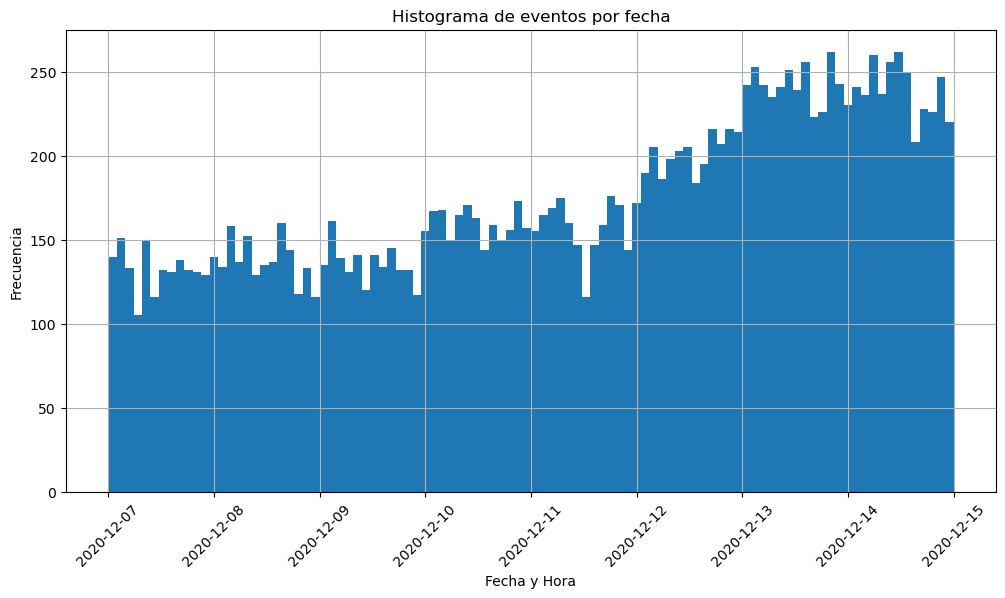

In [19]:
# ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.
print(f"Fecha mínima: {events['event_dt'].min()}")
print(f"Fecha máxima: {events['event_dt'].max()}")

# Traza un histograma por fecha y hora
plt.figure(figsize=(12, 6))
events['event_dt'].hist(bins=100)
plt.xlabel('Fecha y Hora')
plt.ylabel('Frecuencia')
plt.title('Histograma de eventos por fecha')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hace falta calcular y graficar los eventos a lo largo del tiempo
</div>

In [26]:
# ¿Cuántos eventos hay en los registros?
print('Nombres de los eventos:')
for event in df['event_name'].unique():
    print(event)
print()
print('Número de eventos:', len(df['event_name'].unique()))

Nombres de los eventos:
purchase

Número de eventos: 1


- Estudia la conversión en las diferentes etapas del embudo.
    - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es buena práctica tener tantos procesos en una sóla celda, la ventaja de los notebooks es que se puede usar cada celda para hacer cada paso facilitando así la comprensión del proceso. Además, la conversión no está calculada corredctamente, deberías tomar el primer evento `loging` como el punto de partida para calcular el resto, por ejemplo, para la conversión en purchase sería `# usuarios purchase / # usuarios login`
</div>

In [25]:
conversion_data = []

for group in ['A', 'B']:
    # Usuarios del grupo
    group_users = df[df['group'] == group]['user_id'].unique()

    # Usuarios que hicieron login dentro de la ventana
    login_users = df[(df['event_name'] == 'login') & (
        df['user_id'].isin(group_users))]['user_id'].unique()

    # Para cada usuario con login, verificar secuencia de eventos
    product_page_users = []
    product_card_users = []
    purchase_users = []

    for user in login_users:
        user_events = df[df['user_id'] == user].sort_values('event_dt')[
            'event_name'].tolist()

        # Verificar si ocurrió product_page después del login
        if 'product_page' in user_events[user_events.index('login') + 1:]:
            product_page_users.append(user)

            # Verificar product_card después de product_page
            if 'product_card' in user_events[user_events.index('product_page') + 1:]:
                product_card_users.append(user)

                # Verificar purchase después de product_card
                if 'purchase' in user_events[user_events.index('product_card') + 1:]:
                    purchase_users.append(user)

    # Calcular conversiones
    n_login = len(login_users)
    n_product_page = len(product_page_users)
    n_product_card = len(product_card_users)
    n_purchase = len(purchase_users)

    conversion_data.append({
        'group': group,
        'login': n_login,
        'product_page': n_product_page,
        'product_page_conv': n_product_page / n_login if n_login > 0 else 0,
        'product_card': n_product_card,
        'product_card_conv': n_product_card / n_login if n_login > 0 else 0,
        'purchase': n_purchase,
        'purchase_conv': n_purchase / n_login if n_login > 0 else 0
    })

conversion_df = pd.DataFrame(conversion_data)
conversion_df

,group,login,product_page,product_page_conv,product_card,product_card_conv,purchase,purchase_conv
0,A,0,0,0,0,0,0,0
1,B,0,0,0,0,0,0,0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una prueba estadística no te puede dar cómo resultado `nan` eso quiere decir que el módulo que lo calculo no está recibiendo los datos adecuados, y se debería aplicar para la conversión de cada evento. La conversión que se ha calculado aquí no es correcta ya que tienes un 100% cómo si todos los usuarios tuviesen un 100% de conversión y eso no es acertado
</div>

### Al no existir una diferencia entre los grupos, se sugiere replantear la estrategia de marketing empleada y buscar alternativas que puedan tener mayor efecto en los resultados 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones deben ser más detalladas, debes resumir los hallazgos más importantes vistos a lo largo de **todo** el notebook y no sólo de la parte final
</div>


- Evaluar los resultados de la prueba A/B:
    - ¿Qué puedes decir sobre los resultados de la prueba A/B?
    - Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones
- Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B